In [ ]:
!pip install --upgrade mxnet
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.9 MB/s eta 0

In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
df = pd.read_csv('trainsuperstore.csv')
df.head()

,Order Date,Sales
0,06/01/14,2573.820
1,07/01/14,76.728
2,10/01/14,51.940
3,11/01/14,9.940
4,13/01/14,879.939


In [ ]:
df.set_index(df["Order Date"], inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values("Order Date")
df

KeyError: ignored

In [ ]:
df = df.resample('D').fillna('ffill')

In [ ]:
df

,Sales,item_id
Order Date,,
2014-01-03,1893.9950,1
2014-01-04,1893.9950,1
2014-01-05,1893.9950,1
2014-01-06,2024.0600,1
2014-01-07,2024.0600,1
...,...,...
2016-12-07,433.3960,1
2016-12-08,917.2045,1
2016-12-09,1679.8720,1


In [ ]:
df["item_id"] = 1
df

,Sales,item_id
Order Date,,
2014-01-03,1893.9950,1
2014-01-04,1893.9950,1
2014-01-05,1893.9950,1
2014-01-06,2024.0600,1
2014-01-07,2024.0600,1
...,...,...
2016-12-07,433.3960,1
2016-12-08,917.2045,1
2016-12-09,1679.8720,1


In [ ]:
df.describe()

,Sales,item_id
count,1074.000000,1074.0
mean,791.799918,1.0
std,972.006183,0.0
min,4.224000,1.0
25%,161.190000,1.0
50%,435.629500,1.0
75%,1108.561000,1.0
max,10006.174000,1.0


In [ ]:
df.item_id = 1
df

,Sales,item_id
Order Date,,
2014-01-03,1893.9950,1
2014-01-04,1893.9950,1
2014-01-05,1893.9950,1
2014-01-06,2024.0600,1
2014-01-07,2024.0600,1
...,...,...
2016-12-07,433.3960,1
2016-12-08,917.2045,1
2016-12-09,1679.8720,1


In [ ]:
df["Date"] = df.index

In [ ]:
df.set_index(df["item_id"], inplace = True)

In [ ]:
df

,Sales,item_id,Date
item_id,,,
1,1893.9950,1,2014-01-03
1,1893.9950,1,2014-01-04
1,1893.9950,1,2014-01-05
1,2024.0600,1,2014-01-06
1,2024.0600,1,2014-01-07
...,...,...,...
1,433.3960,1,2016-12-07
1,917.2045,1,2016-12-08
1,1679.8720,1,2016-12-09


In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="Date"
)
train_data.head()

Sales
item_id timestamp           
1       2014-01-03  1893.995
        2014-01-04  1893.995
        2014-01-05  1893.995
        2014-01-06  2024.060
        2014-01-07  2024.060

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=30,
    path="autogluon-m4-hourly",
    target="Sales",
    eval_metric="RMSE",
    # ignore_time_index=True
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'medium_quality',
 'prediction_length': 30,
 'random_seed': None,
 'target': 'Sales',
 'time_limit': 600}
Provided training data set with 1074 rows, 1 items (item = single time series). Average time series length is 1074.0.
Training artifacts will be saved to: /content/autogluon-m4-hourly
AutoGluon will save models to autogluon-m4-hourly/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'Sales'
tuning_data is None. Will use the last prediction_length = 30 time steps of each time series as a hold-out 

In [ ]:
predictions = predictor.predict(train_data)
predictions

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: AutoGluonTabular


mean         0.1         0.2          0.3  \
item_id timestamp                                                      
1       2016-12-12   799.226987  300.102983  386.406269   484.726571   
        2016-12-13   782.459376  283.335371  369.638658   467.958959   
        2016-12-14   873.230844  374.106840  460.410126   558.730428   
        2016-12-15   547.661276   48.537272  134.840558   233.160859   
        2016-12-16   570.339584   71.215579  157.518866   255.839167   
        2016-12-17   702.635909  203.511905  289.815191   388.135492   
        2016-12-18   819.063592  319.939588  406.242874   504.563176   
        2016-12-19   846.192478  347.068474  433.371760   531.692061   
        2016-12-20  1172.601739  673.477734  759.781021   858.101275   
        2016-12-21  1314.967391  815.843386  902.146625  1000.466927   
        2016-12-22   878.164888  379.040883  465.344170   563.664471   
        2016-12-23  1030.519446  531.395441  617.698728   716.019029   
        2016-12-24   967.894292  468.770287  555.073574   653.393875   
        2016-12-25   444.249583  -54.874421   31.428865   129.749167   
        2016-12-26   818.135551  319.011546  405.314833   503.635134   
        2016-12-27  1029.675317  530.551312  616.854599   715.174900   
        2016-12-28  1156.080579  656.956575  743.259861   841.580210   
        2016-12-29   749.578086  250.454081  336.757368   435.077669   
        2016-12-30  1006.785953  507.661949  593.965235   692.285537   
        2016-12-31   797.056019  297.932015  384.235301   482.555603   
        2017-01-01  1041.898621  542.774616  629.077903   727.398204   
        2017-01-02   897.794024  398.670019  484.973306   583.293607   
        2017-01-03  1074.914039  575.790034  662.093321   760.413622   
        2017-01-04   955.905358  456.781353  543.084640   641.404941   
        2017-01-05   786.561938  287.437934  373.741220   472.061522   
        2017-01-06   993.111405  493.987400  580.290687   678.610988   
        2017-01-07   782.785587  283.661583  369.964869   468.285170   
        2017-01-08   758.789266  259.665262  345.968548   444.288849   
        2017-01-09   891.261393  392.137388  478.440675   576.760976   
        2017-01-10   988.072211  488.948206  575.251493   673.571794   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
1       2016-12-12   570.481168   670.774172   813.401614  1043.170902   
        2016-12-13   553.713557   654.006560   796.634002  1026.403291   
        2016-12-14   644.485025   744.778029   887.405471  1117.174759   
        2016-12-15   318.915434   419.208460   561.835950   791.605191   
        2016-12-16   341.593741   441.886768   584.514257   814.283499   
        2016-12-17   473.890090   574.183093   716.810583   946.579824   
        2016-12-18   590.317773   690.610777   833.238219  1063.007507   
        2016-12-19   617.446659   717.739663   860.367105  1090.136393   
        2016-12-20   943.855920  1044.148876  1186.776365  1416.545654   
        2016-12-21  1086.221572  1186.514528  1329.142017  1558.911306   
        2016-12-22   649.419069   749.712072   892.339514  1122.108803   
        2016-12-23   801.773627   902.066583  1044.694072  1274.463361   
        2016-12-24   739.148473   839.441523   982.068918  1211.838207   
        2016-12-25   215.503741   315.796768   458.424257   688.193498   
        2016-12-26   589.389732   689.682735   832.310177  1062.079466   
        2016-12-27   800.929498   901.222548  1043.849943  1273.619232   
        2016-12-28   927.334761  1027.627811  1170.255206  1400.024494   
        2016-12-29   520.832267   621.125270   763.752759   993.522001   
        2016-12-30   778.040135   878.333185  1020.960580  1250.729868   
        2016-12-31   568.310201   668.603204   811.230646  1040.999934   
        2017-01-01   813.152802   913.445852  1056.073247  1285.842536   
        2017-01-02  

In [ ]:
# train_data.tail()
len(predictions)

30

In [ ]:
import matplotlib.pyplot as plt


df = pd.read_csv('superstoretest.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index(df["timestamp"], inplace=True)

df

,item_id,timestamp,Sales
timestamp,,,
2016-11-12,1,2016-11-12,2461.7960
2016-12-12,1,2016-12-12,477.4700
2016-12-13,1,2016-12-13,1114.2720
2016-12-14,1,2016-12-14,611.7240
2016-12-15,1,2016-12-15,2231.8950
...,...,...,...
2017-12-24,1,2017-12-24,1393.4940
2017-12-25,1,2017-12-25,832.4540
2017-12-28,1,2017-12-28,551.2568


In [ ]:
df = df.resample('D').fillna('ffill')

In [ ]:
df["item_id"] = 1
df

,item_id,timestamp,Sales
timestamp,,,
2016-11-12,1,2016-11-12,2461.7960
2016-11-13,1,2016-11-12,2461.7960
2016-11-14,1,2016-11-12,2461.7960
2016-11-15,1,2016-11-12,2461.7960
2016-11-16,1,2016-11-12,2461.7960
...,...,...,...
2017-12-26,1,2017-12-25,832.4540
2017-12-27,1,2017-12-25,832.4540
2017-12-28,1,2017-12-28,551.2568


In [ ]:
df.set_index(df["item_id"], inplace = True)

In [ ]:
df.drop("item_id", axis = 1)

,timestamp,Sales
item_id,,
1,2016-11-12,2461.7960
1,2016-11-12,2461.7960
1,2016-11-12,2461.7960
1,2016-11-12,2461.7960
1,2016-11-12,2461.7960
...,...,...
1,2017-12-25,832.4540
1,2017-12-25,832.4540
1,2017-12-28,551.2568


In [ ]:
predictions.index = pd.to_datetime(predictions.index)

TypeError: ignored

In [ ]:
y_past.head(10)

timestamp
2014-01-03    1893.995
2014-01-04    1893.995
2014-01-05    1893.995
2014-01-06    2024.060
2014-01-07    2024.060
2014-01-08      44.128
2014-01-09      44.128
2014-01-10      44.128
2014-01-11     100.384
2014-01-12    4513.606
Name: Sales, dtype: float64

In [ ]:
predictions

NameError: ignored

In [ ]:
y_test

timestamp
2016-11-12    2461.796
2016-11-12    2461.796
2016-11-12    2461.796
2016-11-12    2461.796
2016-11-12    2461.796
                ...   
2017-01-16     730.262
2017-01-16     730.262
2017-01-16     730.262
2017-01-19     919.239
2017-01-20     207.846
Name: Sales, Length: 70, dtype: float64

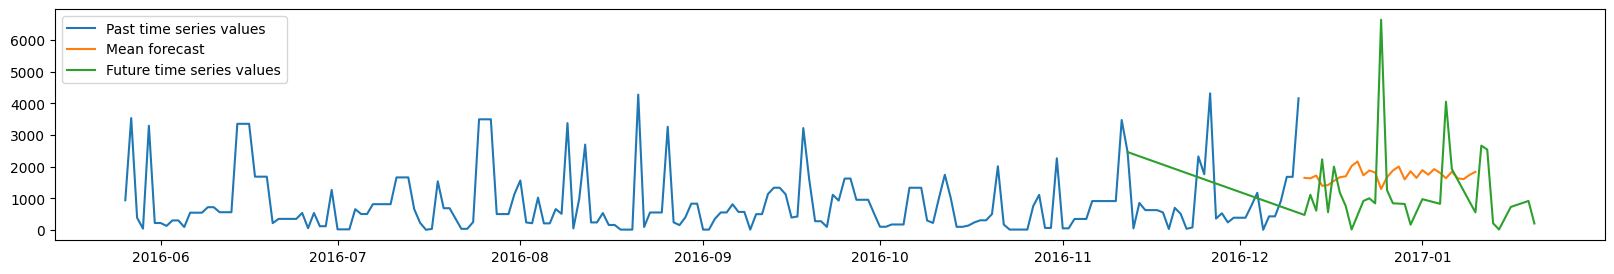

In [ ]:

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
plt.figure(figsize=(20, 3))

item_id = 1
y_past = train_data.loc[item_id]["Sales"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["Sales"][:70]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["0.9"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

# plt.fill_between(
#     y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
# )
plt.legend();

In [ ]:
predictions.to_csv